## 1.Load The Data

In [1]:
# Load pickled data
import pickle

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_clean, y_train_clean = train['features'], train['labels']
X_valid_clean, y_valid_clean = valid['features'], valid['labels']
X_test_clean, y_test_clean = test['features'], test['labels']

## 2. Dataset Summary & Exploration

In [2]:
# Number of training examples
n_train = len(X_train_clean)

# Number of validation examples
n_validation = len(X_valid_clean)

# Number of testing examples.
n_test = len(X_test_clean)

# What's the shape of an traffic sign image?
image_shape = X_train_clean[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of validation examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory Visualization of the dataset

#### Plot traffic sign images 

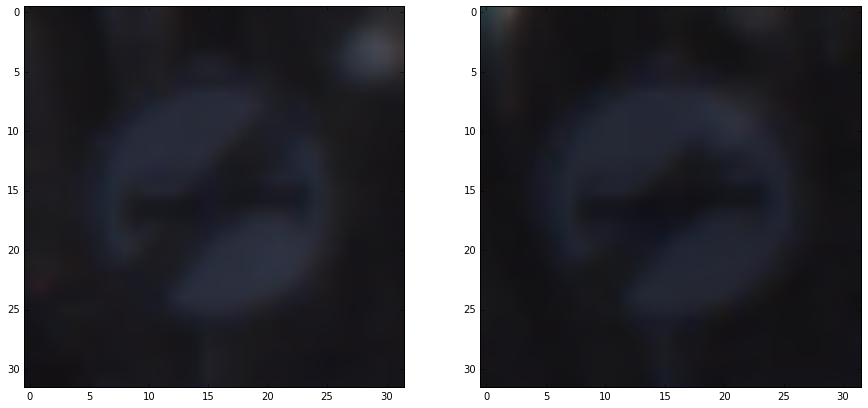

In [3]:
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2

%matplotlib inline


index = 195

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(X_train_clean[index])


plt.subplot(1,2,2)
plt.imshow(X_train_clean[index+2])


#### Plot the counts for each sign on train, valid, test sets

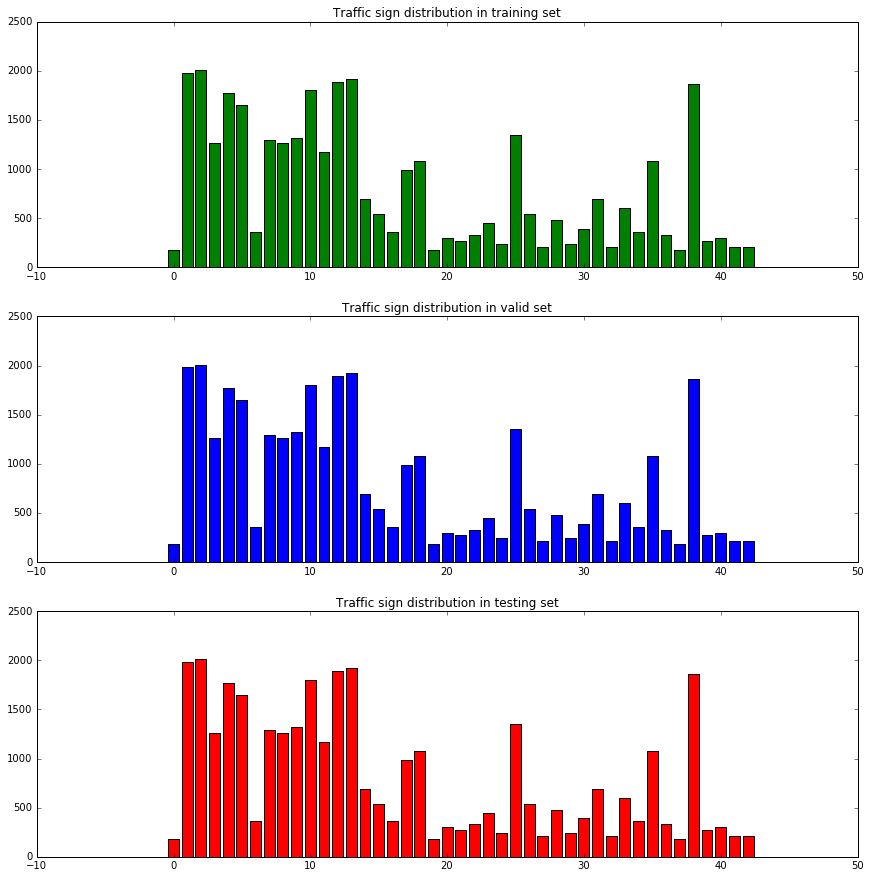

In [4]:
plt.figure(figsize=(30,20))
fig, axarr = plt.subplots(3)
hist1 = np.bincount(y_train_clean)
hist2 = np.bincount(y_valid_clean)
hist3 = np.bincount(y_test_clean)
axarr[0].bar(range(0,43), hist1,  align='center',color='green')
axarr[0].set_title('Traffic sign distribution in training set')
axarr[1].bar(range(0,43), hist1,  align='center',color='blue')
axarr[1].set_title('Traffic sign distribution in valid set')
axarr[2].bar(range(0,43), hist1,  align='center',color='red')
axarr[2].set_title('Traffic sign distribution in testing set')
plt.subplots_adjust(left = 0.1, right = 2, bottom = 0.1, top = 3,hspace = 0.2)
plt.show()

In [5]:
import csv
train_dis = []
valid_dis = []
test_dis = []


with open('signnames.csv') as file:
    reader = csv.DictReader(file)
    signs = {}
    print("{0:<10}".format("ClassID"),"{0:<53}".format("SignName")
          ,"{0:<15}".format("% Train"),"{0:<20}".format("% Validation"), "{0:<5}".format("% Test"))
    for row in reader:
        index = int(row["ClassId"])
        print("{0:<10}".format(index),"{0:<50}".format(row['SignName'])
              ,"{0:10.3f}".format(np.count_nonzero(y_train_clean == index)*100/n_train)
              ,"{0:15.3f}".format(np.count_nonzero(y_valid_clean == index)*100/n_validation)
              ,"{0:19.3f}".format(np.count_nonzero(y_test_clean == index)*100/n_test))
        signs[int(row["ClassId"])] = row['SignName']
        
        train_dis.append(np.count_nonzero(y_train_clean == index)*100/n_train)
        valid_dis.append(np.count_nonzero(y_valid_clean == index)*100/n_validation)
        test_dis.append(np.count_nonzero(y_test_clean == index)*100/n_test)

ClassID    SignName                                              % Train         % Validation         % Test
0          Speed limit (20km/h)                                    0.517           0.680               0.475
1          Speed limit (30km/h)                                    5.690           5.442               5.701
2          Speed limit (50km/h)                                    5.776           5.442               5.938
3          Speed limit (60km/h)                                    3.621           3.401               3.563
4          Speed limit (70km/h)                                    5.086           4.762               5.226
5          Speed limit (80km/h)                                    4.742           4.762               4.988
6          End of speed limit (80km/h)                             1.035           1.361               1.188
7          Speed limit (100km/h)                                   3.707           3.401               3.563
8          Speed li

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 7 Text yticklabel objects>)

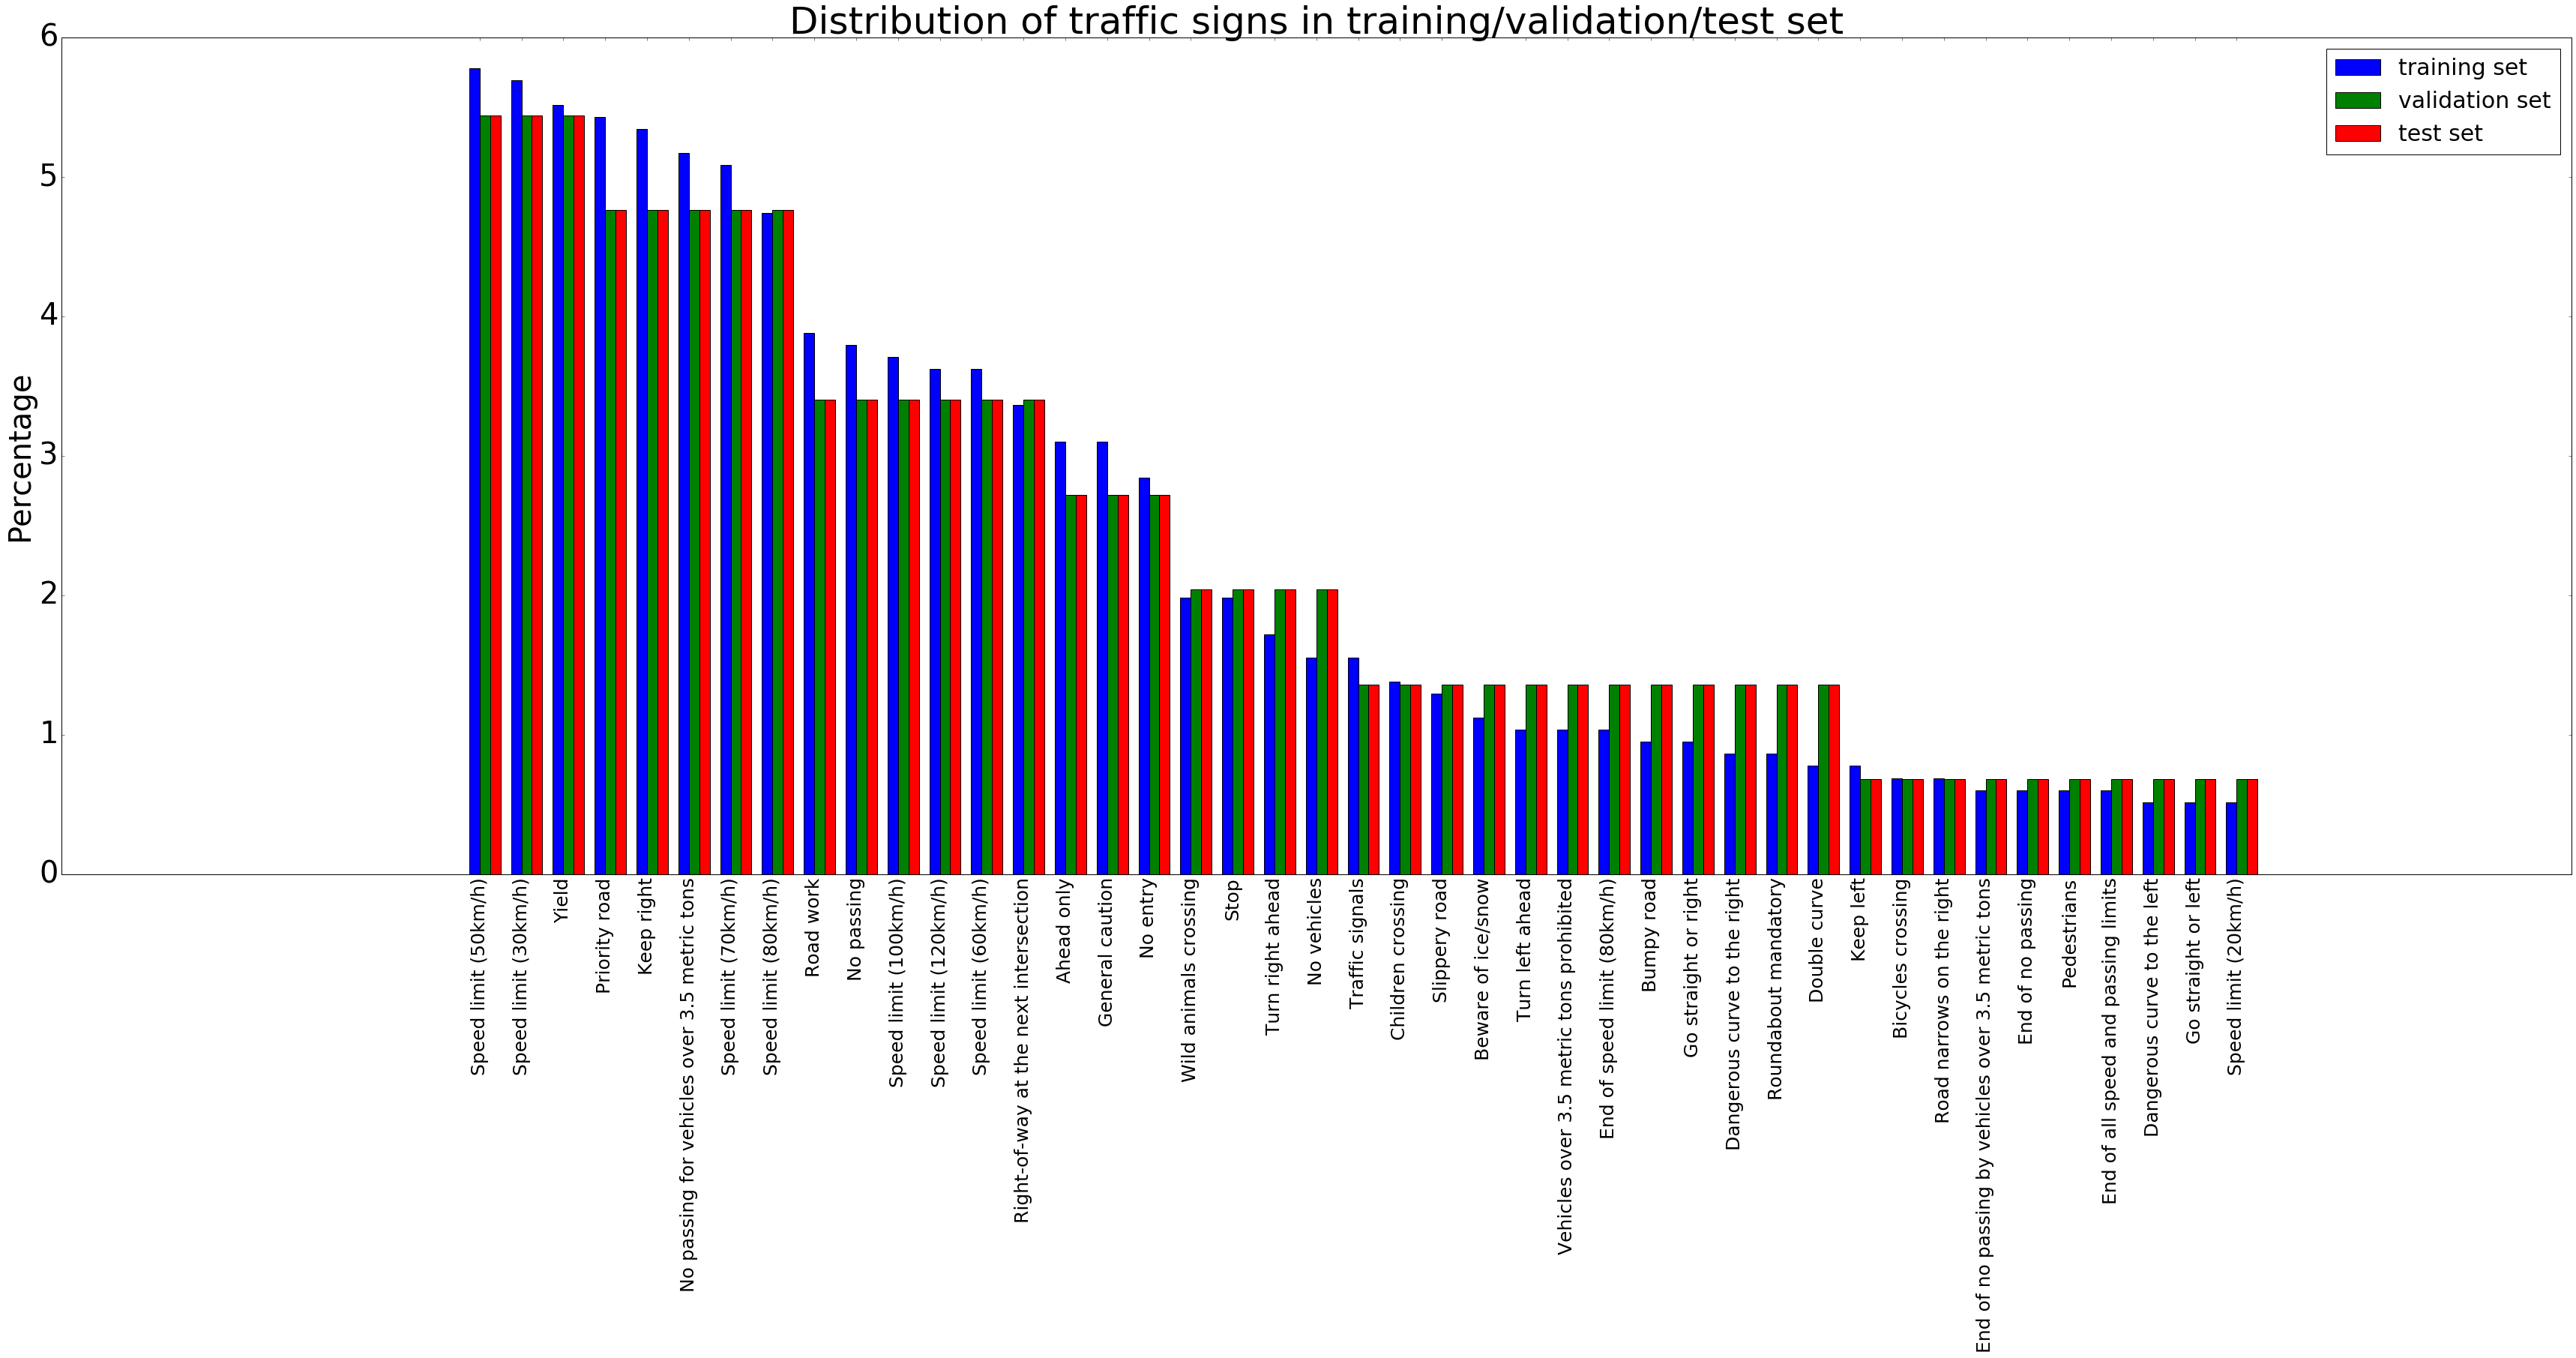

In [6]:
#print(signs)
sorted_signs_dis = []

sorted_train_dis = []
sorted_valid_dis = []
sorted_test_dis = []


sorted_index = np.argsort(train_dis)

for i in sorted_index:
    sorted_train_dis.append(train_dis[i])
    sorted_valid_dis.append(valid_dis[i])
    sorted_test_dis.append(test_dis[i])
    sorted_signs_dis.append(signs[i])

#print(sorted_index)
#print(sorted_signs_dis)
#print(sorted_train_dis)   
  
#print(signs_dis)
width = 0.25
plt.figure(figsize=(60,20))
index = np.arange(43)

dis1 = plt.bar(index-width, height=sorted_train_dis[::-1], align='edge', width=width, color='b')
dis2 = plt.bar(index , height=sorted_valid_dis[::-1], align='edge', width=width, color='g')
dis3 = plt.bar(index + width, height=sorted_valid_dis[::-1], align='edge',width=width, color='r')
plt.xticks(index,sorted_signs_dis[::-1], rotation=90,fontsize=25)
plt.legend((dis1[0],dis2[0],dis3[0]),('training set','validation set','test set'),fontsize=30)
plt.title("Distribution of traffic signs in training/validation/test set", fontsize=50)
plt.ylabel("Percentage", fontsize=40)
plt.yticks(fontsize=40)



## 3. Design and Test a Model Architecture

### Pre-process the Data Set

In [7]:
import matplotlib.pyplot as plt
import random
import numpy as np

%matplotlib inline

## make copies for train, valid, test data set
X_train = np.copy(X_train_clean)
y_train = np.copy(y_train_clean)

X_valid = np.copy(X_valid_clean)
y_valid = np.copy(y_valid_clean)

X_test = np.copy(X_test_clean)
y_test = np.copy(y_test_clean)


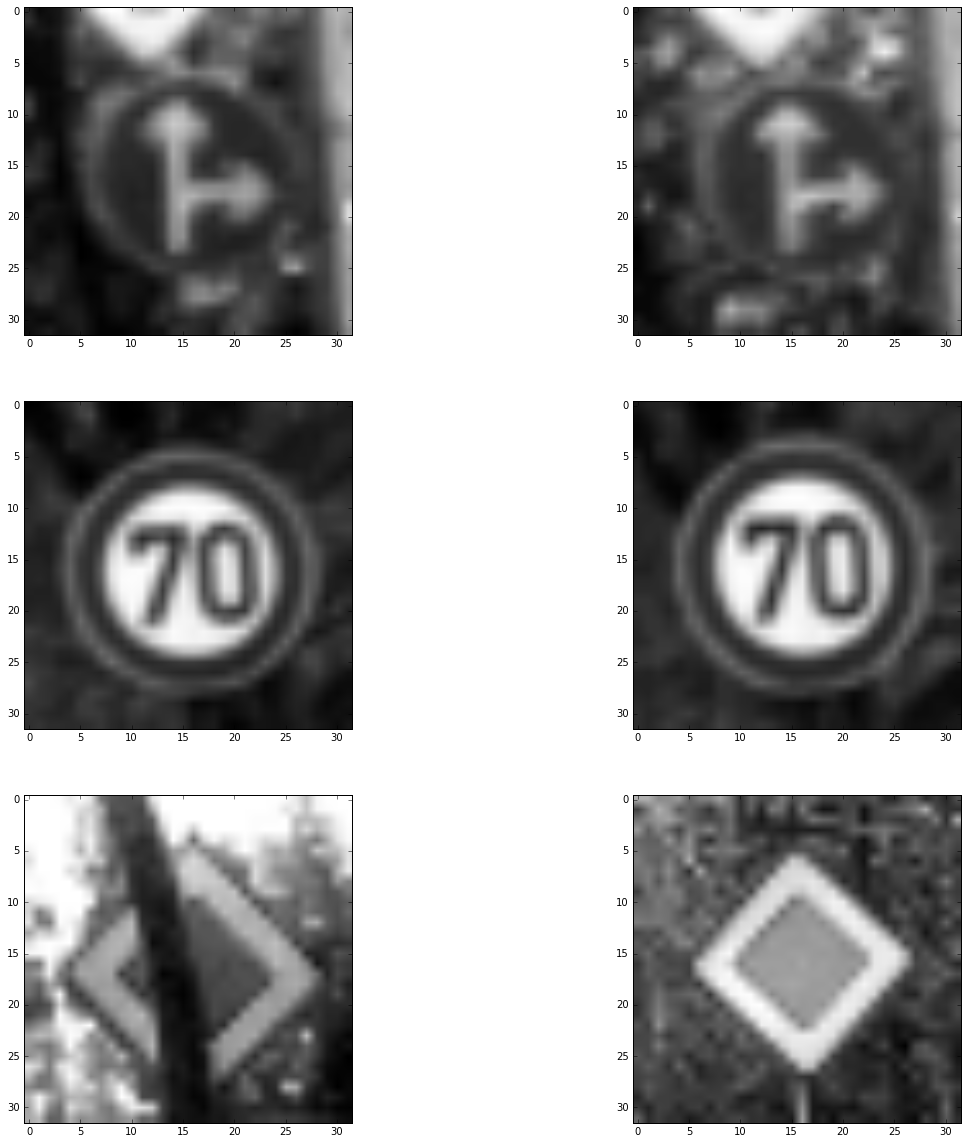

In [8]:
###Gray scaling the data
from sklearn.utils import shuffle


def grayscale(X_data):
    gray_images = []
    for image in X_data:
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        gray_image = gray_image[:,:,np.newaxis]
        gray_images.append(gray_image)
        
    gray_images = np.asarray(gray_images)
    
    return gray_images

gray_train_images = grayscale(X_train)
gray_valid_images = grayscale(X_valid)
gray_test_images = grayscale(X_test)

index_offset = 1010
plt.figure(figsize=(20,20))    
plt.subplot(3,2,1)
plt.imshow(gray_train_images[index_offset].squeeze(),cmap='gray')

plt.subplot(3,2,2)
plt.imshow(gray_train_images[index_offset+1].squeeze(),cmap='gray')

plt.subplot(3,2,3)
plt.imshow(gray_valid_images[index_offset].squeeze(),cmap='gray')

plt.subplot(3,2,4)
plt.imshow(gray_valid_images[index_offset+1].squeeze(),cmap='gray')

plt.subplot(3,2,5)
plt.imshow(gray_test_images[index_offset-2].squeeze(),cmap='gray')

plt.subplot(3,2,6)
plt.imshow(gray_test_images[index_offset-1].squeeze(),cmap='gray')



In [25]:
## Normalized Data set
Normalized_X_train = (gray_train_images - np.float32(128)) / np.float32(128)
Normalized_X_valid = (gray_valid_images - np.float32(128)) / np.float32(128)
Normalized_X_test = (gray_test_images - np.float32(128)) / np.float32(128)

X_train, y_train = shuffle(Normalized_X_train, y_train_clean)
X_valid, y_valid = shuffle(Normalized_X_valid, y_valid_clean)
X_test, y_test = shuffle(Normalized_X_test, y_test_clean)


### Rotate the images and generate a new train data set

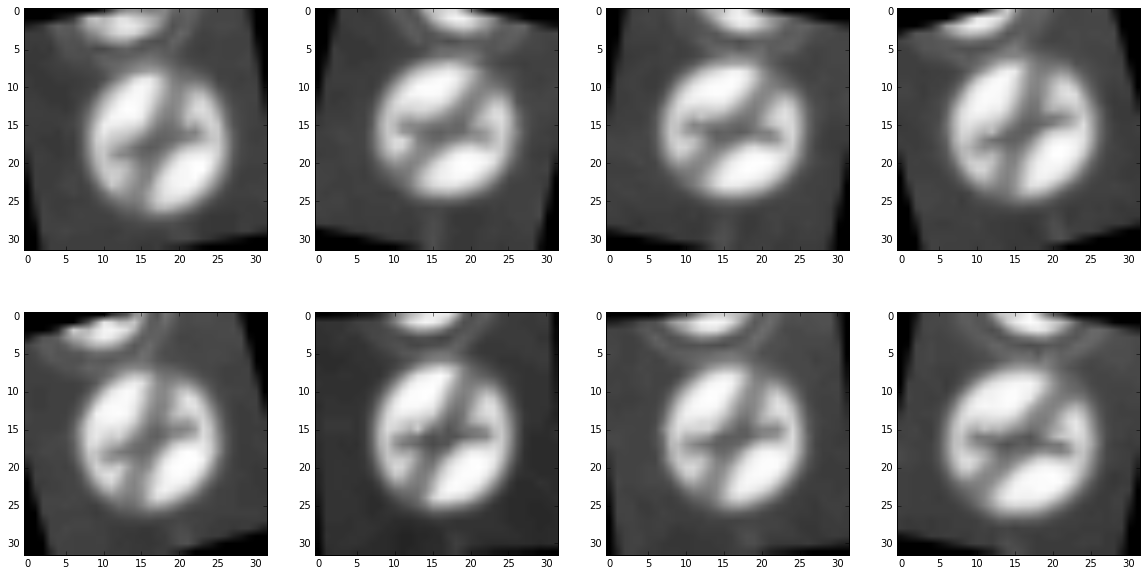

In [10]:
import random

def rotation(image,ang_range):
    rand_num = random.uniform(-1,1)
    rows, cols, ch = image.shape
    rot_ang = ang_range * rand_num
    M = cv2.getRotationMatrix2D((cols/2,rows/2),rot_ang,1)
    Rot_image = cv2.warpAffine(image,M,(cols,rows))
    Rot_image = Rot_image[:,:,np.newaxis]

    return Rot_image



plt.figure(figsize=(20,10))
for i in range(0,8):
    plt.subplot(2,4,i+1)
    rot_image = rotation(gray_train_images[i],15)
    plt.imshow(rot_image.squeeze(),cmap='gray')
plt.show()
    


In [82]:
Normalized_X_train_rot = (X_train_rot - np.float32(128)) / np.float32(128)
X_train_rot, y_train_rot = shuffle(Normalized_X_train_rot, y_train_clean)


### Translate the images and generate a new train data set

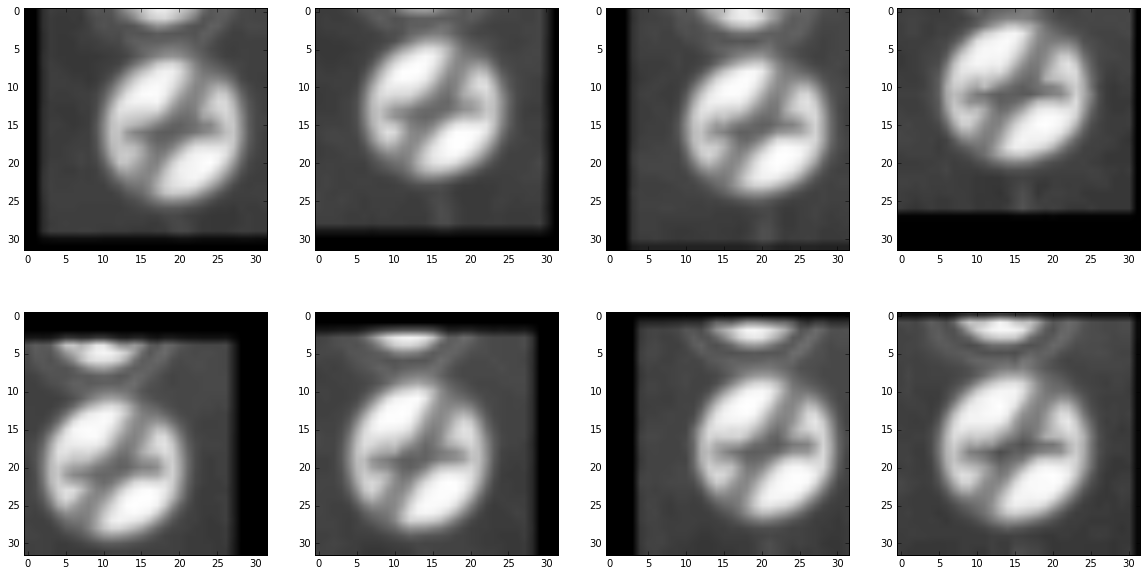

In [11]:
def translation(image,trans_range):
    rand_num = random.uniform(-trans_range,trans_range)
    rand_num2 = random.uniform(-trans_range,trans_range)
    rows, cols, ch = image.shape
    h_shift = rand_num
    v_shift = rand_num2
    M = np.float32([[1,0,h_shift],[0,1,v_shift]])
    trans_image = cv2.warpAffine(image,M,(cols,rows))
    trans_image = trans_image[:,:,np.newaxis]
    
    return trans_image

plt.figure(figsize=(20,10))
for i in range(0,8):
    plt.subplot(2,4,i+1)
    trans_image = translation(gray_train_images[i],5)
    plt.imshow(trans_image.squeeze(),cmap='gray')
plt.show()



In [87]:
Normalized_X_train_trans = (X_train_trans - np.float32(128)) / np.float32(128)
X_train_trans, y_train_trans = shuffle(Normalized_X_train_trans, y_train_clean)


### Shearing the images 

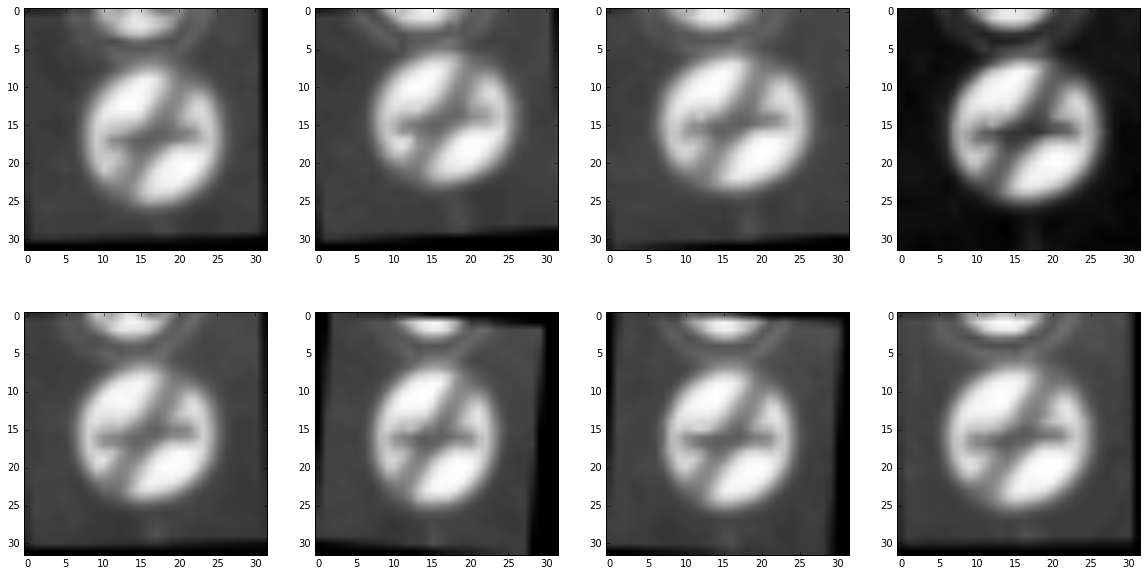

In [14]:
def shear(image,shear_range):
    rows, cols, ch = image.shape
    
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    
    pt1 = 5 +  np.random.uniform(-shear_range, shear_range)
    pt2 = 20 + np.random.uniform(-shear_range, shear_range)

    
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    
    M = cv2.getAffineTransform(pts1,pts2)
    
    return cv2.warpAffine(image,M,(cols,rows))

plt.figure(figsize=(20,10))
for i in range(0,8):
    plt.subplot(2,4,i+1)
    shear_image = shear(gray_train_images[i],1)
    plt.imshow(shear_image,cmap='gray')
plt.show()


In [27]:
def generate_extra_images(X_train, y_train, ang_range, trans_range, shear_range, generate_num):
    
    new_X_train = []
    new_y_train = []
    
    for i, image in enumerate(X_train):
        y = y_train[i]
        new_X_train.append(image)
        new_y_train.append(y)
        for j in range(generate_num):
            new_image = rotation(image, ang_range)
            new_image = translation(new_image, trans_range)
            new_image = shear(new_image, shear_range)
            new_X_train.append(new_image[:,:,np.newaxis])
            new_y_train.append(y)
            
    return new_X_train, new_y_train

new_X_train, new_y_train = generate_extra_images(X_train, y_train,15,5,1,6)
#print(new_X_train[0].shape)

print(len(X_train))
print(len(new_X_train))



34799
243593


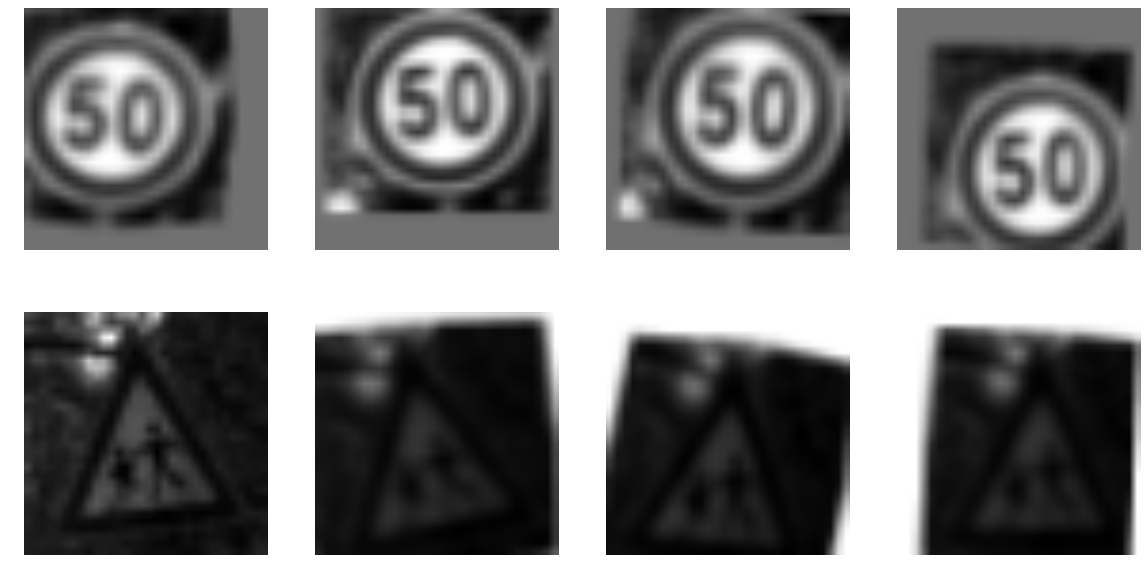

In [28]:
plt.figure(figsize=(20,10))
for i in range(0,8):
    plt.subplot(2,4,i+1)
    image = new_X_train[i+11000]
    plt.imshow(image.squeeze(),cmap='gray')
    plt.axis('off')
plt.show() 

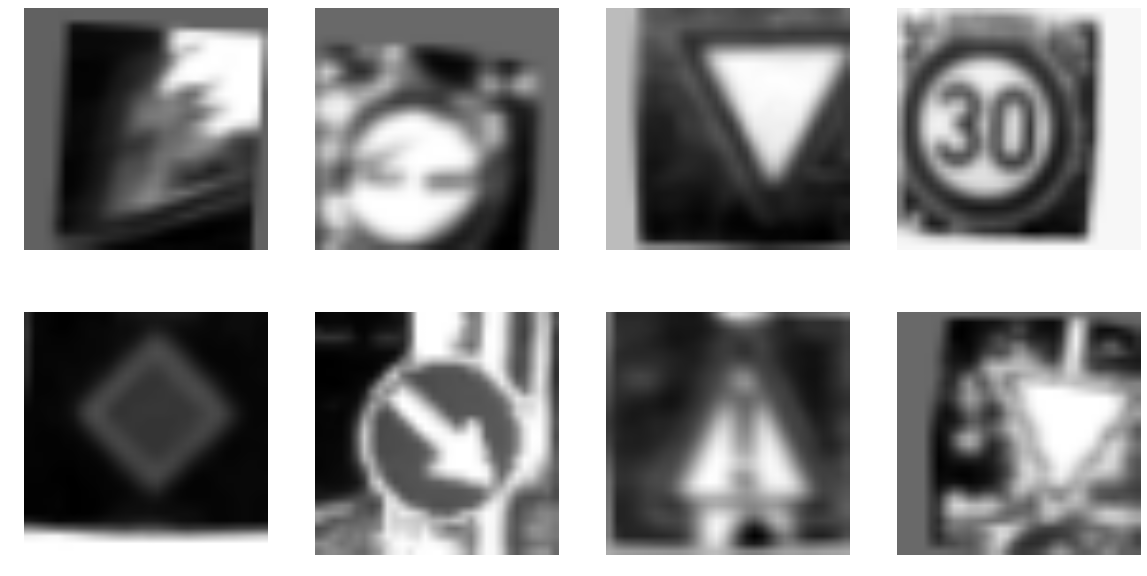

In [29]:
#Normalized_X_train_trans = (X_train_trans - np.float32(128)) / np.float32(128)
X_train, y_train = shuffle(new_X_train, new_y_train)
plt.figure(figsize=(20,10))
for i in range(0,8):
    plt.subplot(2,4,i+1)
    image = X_train[i+11000]
    plt.imshow(image.squeeze(),cmap='gray')
    plt.axis('off')
plt.show() 

## Model Architecture

#### Setup TensorFlow

In [19]:
import tensorflow as tf

EPOCHS = 25
BATCH_SIZE = 128

#### LeNet-5 Neural Network architecture

In [20]:
from tensorflow.contrib.layers import flatten

def LeNet(x):
    
    mu = 0
    sigma = 0.1
    
    weights = {
        'wc1' : tf.Variable(tf.truncated_normal(shape=([5,5,1,6]), mean=mu, stddev=sigma)),
        'wc2' : tf.Variable(tf.truncated_normal(shape=([5,5,6,16]), mean=mu, stddev=sigma)),
        'wd1' : tf.Variable(tf.truncated_normal(shape=([400,120]), mean=mu, stddev=sigma)),
        'wd2' : tf.Variable(tf.truncated_normal(shape=([120,84]), mean=mu, stddev=sigma)),
        'out' : tf.Variable(tf.truncated_normal(shape=([84,n_classes]), mean=mu, stddev=sigma))
    
        
    }
    
    biases = {
        'bc1' : tf.Variable(tf.truncated_normal(shape=([6]), mean=mu, stddev=sigma)),
        'bc2' : tf.Variable(tf.truncated_normal(shape=([16]), mean=mu, stddev=sigma)),
        'bd1' : tf.Variable(tf.truncated_normal(shape=([120]), mean=mu, stddev=sigma)),
        'bd2' : tf.Variable(tf.truncated_normal(shape=([84]), mean=mu, stddev=sigma)),
        'out' : tf.Variable(tf.truncated_normal(shape=([n_classes]), mean=mu, stddev=sigma))
    
        
    }
    
    #Layer1
    conv1 = tf.nn.conv2d(x, weights['wc1'],strides=[1,1,1,1],padding='VALID')
    conv1 = tf.nn.bias_add(conv1,biases['bc1'])
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    
    #Layer2
    conv2 = tf.nn.conv2d(conv1,weights['wc2'],strides=[1,1,1,1],padding='VALID')
    conv2 = tf.nn.bias_add(conv2,biases['bc2'])
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    fc1 = flatten(conv2)
    
    #Layer3
    fc1 = tf.add(tf.matmul(fc1,weights['wd1']),biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1,keep_prob)
    
    #Layer4
    fc2 = tf.add(tf.matmul(fc1,weights['wd2']),biases['bd2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2,keep_prob)
    
    #Layer5
    logits = tf.add(tf.matmul(fc2, weights['out']),biases['out'])
    
    return logits
    

### Train, Validate and Test the Model

In [21]:
x = tf.placeholder(tf.float32,(None,32,32,1))
y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y,n_classes)
keep_prob = tf.placeholder(tf.float32)

rate = 0.001
logits = LeNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
saver = tf.train.Saver()


def evaluation(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy*len(batch_x))
    return total_accuracy / num_examples

def training(X_data,y_data):
    num_examples = len(X_data)
    total_accuracy = 0.0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_data[offset:end], y_data[offset:end]
        _, accuracy = sess.run([training_operation,accuracy_operation],feed_dict={x: batch_x, y:batch_y,keep_prob:0.7})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
        

### Train the model with normal data set

In [30]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training......")
    print()
    for i in range (EPOCHS):
        training_accuracy = training(X_train,y_train)
        validation_accuracy = evaluation(X_valid, y_valid)
        Test_accuracy = evaluation(X_test, y_test)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}  ".format(training_accuracy),
              "Validation Accuracy = {:.3f}  ".format(validation_accuracy),
              "Test Accuracy = {:.3f}".format(Test_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training......

EPOCH 1 ...
Training Accuracy = 0.415   Validation Accuracy = 0.768   Test Accuracy = 0.780

EPOCH 2 ...
Training Accuracy = 0.674   Validation Accuracy = 0.849   Test Accuracy = 0.847

EPOCH 3 ...
Training Accuracy = 0.751   Validation Accuracy = 0.864   Test Accuracy = 0.870

EPOCH 4 ...
Training Accuracy = 0.793   Validation Accuracy = 0.877   Test Accuracy = 0.881



KeyboardInterrupt: 

### Train the model with rotated data set

In [17]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    num_examples = len(X_train_rot)
    
    print("Training......")
    print()
    for i in range (EPOCHS):
        training_accuracy = training(X_train_rot,y_train_rot)
        validation_accuracy = evaluation(X_valid, y_valid)
        Test_accuracy = evaluation(X_test, y_test)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.5f}  ".format(training_accuracy),
              "Validation Accuracy = {:.5f}  ".format(validation_accuracy),
              "Test Accuracy = {:.5f}".format(Test_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training......

EPOCH 1 ...
Training Accuracy = 0.94115   Validation Accuracy = 0.95306   Test Accuracy = 0.93302

EPOCH 2 ...
Training Accuracy = 0.95204   Validation Accuracy = 0.95306   Test Accuracy = 0.93357

EPOCH 3 ...
Training Accuracy = 0.96052   Validation Accuracy = 0.95692   Test Accuracy = 0.93698

EPOCH 4 ...
Training Accuracy = 0.96506   Validation Accuracy = 0.95193   Test Accuracy = 0.93674

EPOCH 5 ...
Training Accuracy = 0.96701   Validation Accuracy = 0.96281   Test Accuracy = 0.94228

EPOCH 6 ...
Training Accuracy = 0.96848   Validation Accuracy = 0.96304   Test Accuracy = 0.93911

EPOCH 7 ...
Training Accuracy = 0.97026   Validation Accuracy = 0.96553   Test Accuracy = 0.93824

EPOCH 8 ...
Training Accuracy = 0.97296   Validation Accuracy = 0.96327   Test Accuracy = 0.93927

EPOCH 9 ...
Training Accuracy = 0.97284   Validation Accuracy = 0.96054   Test Accuracy = 0.93903

EPOCH 10 ...
Training Accuracy = 0.97440   Validation Accuracy = 0.95850   Test Accuracy = 0.

### Train the model with translated data set

In [18]:
EPOCHS = 40

with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    num_examples = len(X_train_trans)
    
    print("Training......")
    print()
    for i in range (EPOCHS):
        training_accuracy = training(X_train_trans,y_train_trans)  
        validation_accuracy = evaluation(X_valid, y_valid)
        Test_accuracy = evaluation(X_test, y_test)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.5f}  ".format(training_accuracy),
              "Validation Accuracy = {:.5f}  ".format(validation_accuracy),
              "Test Accuracy = {:.5f}".format(Test_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training......

EPOCH 1 ...
Training Accuracy = 0.88845   Validation Accuracy = 0.96803   Test Accuracy = 0.94291

EPOCH 2 ...
Training Accuracy = 0.91971   Validation Accuracy = 0.96349   Test Accuracy = 0.94252

EPOCH 3 ...
Training Accuracy = 0.92948   Validation Accuracy = 0.96281   Test Accuracy = 0.94600

EPOCH 4 ...
Training Accuracy = 0.93733   Validation Accuracy = 0.96485   Test Accuracy = 0.94735

EPOCH 5 ...
Training Accuracy = 0.94531   Validation Accuracy = 0.96440   Test Accuracy = 0.94917

EPOCH 6 ...
Training Accuracy = 0.94931   Validation Accuracy = 0.97029   Test Accuracy = 0.94830

EPOCH 7 ...
Training Accuracy = 0.95661   Validation Accuracy = 0.96485   Test Accuracy = 0.94624

EPOCH 8 ...
Training Accuracy = 0.95560   Validation Accuracy = 0.96168   Test Accuracy = 0.94933

EPOCH 9 ...
Training Accuracy = 0.95827   Validation Accuracy = 0.95941   Test Accuracy = 0.94964

EPOCH 10 ...
Training Accuracy = 0.96017   Validation Accuracy = 0.96349   Test Accuracy = 0.

## 4. Test a Model on New Images

### Load and Output the images

In [77]:
def read_resize(file):
    read_file = cv2.imread(file)
    if (read_file) is not None:
        resized_image = cv2.resize(cv2.cvtColor(read_file, cv2.COLOR_BGR2RGB),(32,32))
        return resized_image
    else:
        print("cv2 cannot read image")
        return None

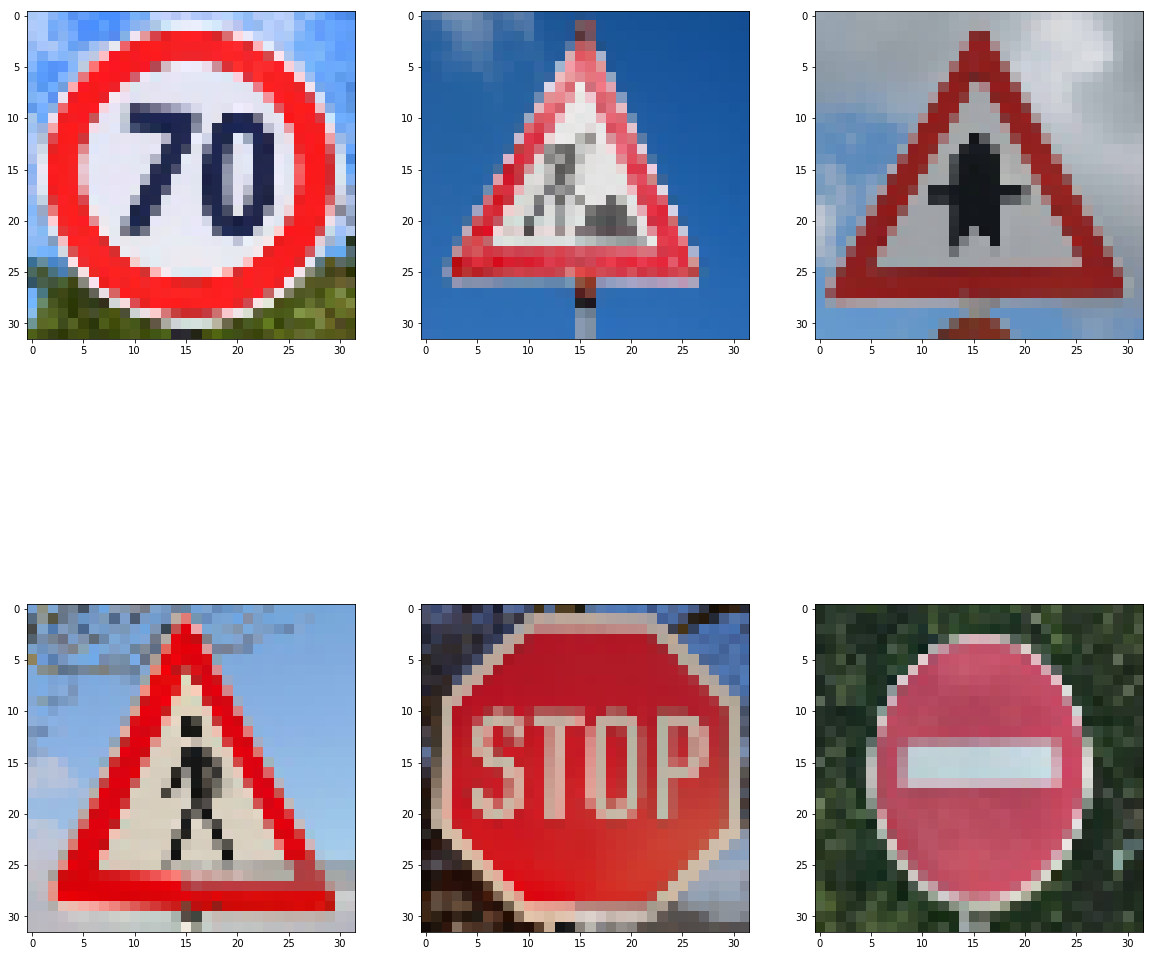

In [78]:
import cv2

read_files = ["New-Traffic-Signs/GTS1.jpg",
              "New-Traffic-Signs/GTS2.jpg",
              "New-Traffic-Signs/GTS3.jpg",
              "New-Traffic-Signs/GTS4.jpg",
              "New-Traffic-Signs/GTS5.jpg",
              "New-Traffic-Signs/GTS6.jpg"]

test_images = np.empty([6,32,32,3],dtype = np.uint8)

plt.figure(figsize=(20,20))
for i, file in enumerate(read_files):
    test_images[i] = read_resize(file)
    plt.subplot(2,3,i+1)
    plt.imshow(test_images[i])
    




### Plot similiar Traffic signs from train data set

Sign 1: Speed limit (70km/h)
Sign 2: Road work
Sign 3: Right-of-way at the next intersection
Sign 4: Pedestrians
Sign 5: Stop
Sign 6: No entry


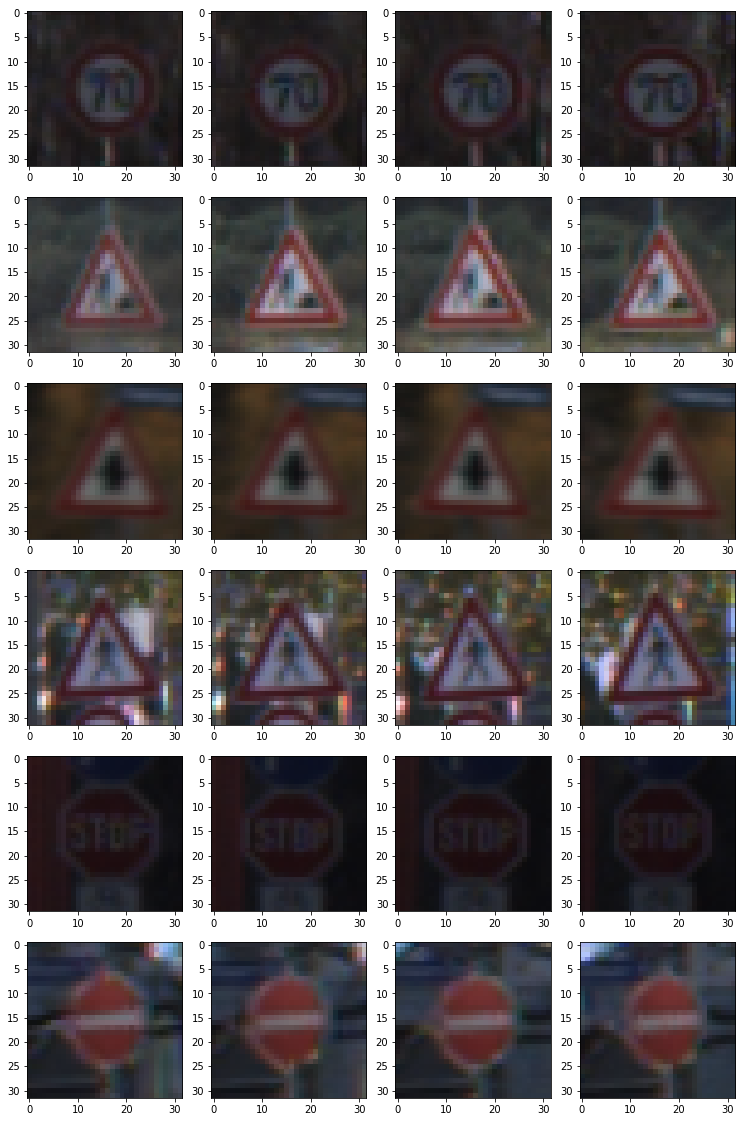

In [56]:
count = 0
row = 6
col = 4
fig = plt.figure(figsize=(20,20))

print ("Sign 1:",signs[4])
for i,l in enumerate(y_train_clean):
    if (l == 4 and count < col):
        plt.subplots_adjust(left = 0.1, right = 0.6,wspace = 0.2 )
        plt.subplot(row,col,count+1)
        plt.imshow(X_train_clean[i])
        count += 1

print ("Sign 2:",signs[25])
count = 0
for i,l in enumerate(y_train_clean):
    if (l == 25 and count < col):
        plt.subplots_adjust(left = 0.1, right = 0.6,wspace = 0.1 )
        plt.subplot(row,col,count+5)
        plt.imshow(X_train_clean[i])
        count += 1

        
print ("Sign 3:",signs[11])
count = 0
for i,l in enumerate(y_train_clean):
    if (l == 11 and count < col):
        plt.subplots_adjust(left = 0.1, right = 0.6,wspace = 0.1 )
        plt.subplot(row,col,count+9)
        plt.imshow(X_train_clean[i])
        count += 1

print ("Sign 4:",signs[27])
count = 0
for i,l in enumerate(y_train_clean):
    if (l == 27 and count < col):
        plt.subplots_adjust(left = 0.1, right = 0.6,wspace = 0.1 )
        plt.subplot(row,col,count+13)
        plt.imshow(X_train_clean[i])
        count += 1
        
print ("Sign 5:",signs[14])
count = 0
for i,l in enumerate(y_train_clean):
    if (l == 14 and count < col):
        plt.subplots_adjust(left = 0.1, right = 0.6,wspace = 0.1 )
        plt.subplot(row,col,count+17)
        plt.imshow(X_train_clean[i])
        count += 1
        
print ("Sign 6:",signs[17])
count = 0
for i,l in enumerate(y_train_clean):
    if (l == 17 and count < col):
        plt.subplots_adjust(left = 0.1, right = 0.6,wspace = 0.1 )
        plt.subplot(row,col,count+21)
        plt.imshow(X_train_clean[i])
        count += 1

In [57]:
import cv2


### Gray scaling, Normalizing images
def pre_process(X_data):
    gray_images = []
    for image in X_data:
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        gray_image = gray_image[:,:,np.newaxis]
        gray_images.append(gray_image)
        
    gray_images = np.asarray(gray_images)
    
    Normalized_X = (gray_images - np.float32(128)) / np.float32(128)
    
    return Normalized_X

In [58]:
###Pre-process
Normalized_images = pre_process(test_images)


### Predict the Sign Type for Each Image

In [72]:
import csv

with open('signnames.csv') as file:
    reader = csv.DictReader(file)
    signs = {}
    for row in reader:
        index = int(row["ClassId"])
        signs[int(row["ClassId"])] = row['SignName']

with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predict = sess.run([tf.argmax(logits,1)],feed_dict={x:Normalized_images, keep_prob:1.0})
    print("        Prediction                                Reality")
    print("Sign 1:","{:<20}".format(signs[predict[0][0]]), "{:<20}".format(""), signs[4])
    print("Sign 2:","{:<20}".format(signs[predict[0][1]]), "{:<20}".format(""), signs[25])
    print("Sign 3:","{:<20}".format(signs[predict[0][2]]), "{:<3}".format(""), signs[11])
    print("Sign 4:","{:<20}".format(signs[predict[0][3]]), "{:<20}".format(""), signs[27])
    print("Sign 5:","{:<20}".format(signs[predict[0][4]]), "{:<20}".format(""), signs[14])
    print("Sign 6:","{:<20}".format(signs[predict[0][5]]), "{:<20}".format(""), signs[17])



        Prediction                                Reality
Sign 1: Speed limit (30km/h)                      Speed limit (70km/h)
Sign 2: Road work                                 Road work
Sign 3: Right-of-way at the next intersection     Right-of-way at the next intersection
Sign 4: Pedestrians                               Pedestrians
Sign 5: Stop                                      Stop
Sign 6: No entry                                  No entry


### Analyze Performance

In [60]:
reality = [4,25,11,27,14,17]
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    accuracy = sess.run(accuracy_operation,feed_dict={x:Normalized_images, y:reality,keep_prob:1.0})
    
print(accuracy)

0.833333


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [61]:
softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, k = 5)

with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_5 = sess.run(top_k,feed_dict={x:Normalized_images, keep_prob:1.0})

print("                                Top 5 Softmax Probabilities            ")
for i in range(0,6):
    print("Sign ",i+1,":", "{:<12}".format(signs[top_5[1][i][0]]),"| ", "{:<12}".format(signs[top_5[1][i][1]]),"| "
        ,"{:<12}".format(signs[top_5[1][1][2]]),"| ","{:<12}".format(signs[top_5[1][1][3]])," | "
        ,"{:<12}".format(signs[top_5[1][1][4]]))
    print("       ","{:.5f}".format(top_5[0][i][0]),"     | ", "{:.5f}".format(top_5[0][i][1]),"     | "
      ,"{:.5f}".format(top_5[0][i][2]), "     | ","{:.5f}".format(top_5[0][1][3]),"           | "
      ,"{:.5f}".format(top_5[0][i][4]))

                                Top 5 Softmax Probabilities            
Sign  1 : Speed limit (30km/h) |  Speed limit (20km/h) |  Bumpy road   |  Beware of ice/snow  |  Bicycles crossing
        1.00000      |  0.00000      |  0.00000      |  0.00000            |  0.00000
Sign  2 : Road work    |  Road narrows on the right |  Bumpy road   |  Beware of ice/snow  |  Bicycles crossing
        0.99986      |  0.00012      |  0.00002      |  0.00000            |  0.00000
Sign  3 : Right-of-way at the next intersection |  Beware of ice/snow |  Bumpy road   |  Beware of ice/snow  |  Bicycles crossing
        1.00000      |  0.00000      |  0.00000      |  0.00000            |  0.00000
Sign  4 : Pedestrians  |  Right-of-way at the next intersection |  Bumpy road   |  Beware of ice/snow  |  Bicycles crossing
        1.00000      |  0.00000      |  0.00000      |  0.00000            |  0.00000
Sign  5 : Stop         |  Keep left    |  Bumpy road   |  Beware of ice/snow  |  Bicycles crossing
    